<a href="https://colab.research.google.com/github/sivaroot/ProjectCPE-V.2/blob/master/Test/UnitTest_GaussianMixtureSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [0]:
img = cv2.imread("75yo_male.jpg",0)
img = cv2.blur(img,(6,6))
data = img.ravel()
newdata  = np.expand_dims(data,1)

In [0]:
gmm = GaussianMixture(n_components = 3)
gmm = gmm.fit(newdata)




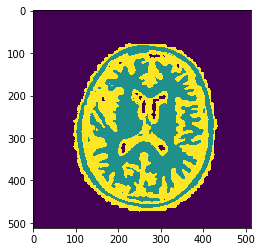

In [33]:
cluster = gmm.predict(newdata)
#cluster[cluster != 4] = 0  #labeling manual
cluster = cluster.reshape(512, 512)
plt.imshow(cluster)

